### 1 . Implement Naïve Bayes method using scikit-learn Use iris dataset available in https://umkc.box.com/s/pm3cebmhxpnczi6h87k2lwwiwdvtxyk8
### Use cross validation to create training and testing partEvaluate the model on testing part
### 2. Implement linear SVMmethodusing scikit library 
### 3. Compare the results and report accuracy, precision, F-measure and Recall

In [2]:
#import packages to do analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [10]:
#vizulization'
import seaborn as sns
sns.set(style="white",color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#machine learning models
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

In [5]:
#read the data
train_data=pd.read_csv('iris.csv')

In [6]:
print(train_data.columns.values)

['sepal length' 'sepal width' 'petal length' 'petal width' 'class']


In [11]:
train_data.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
train_data.tail(5)

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
train_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
train_data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

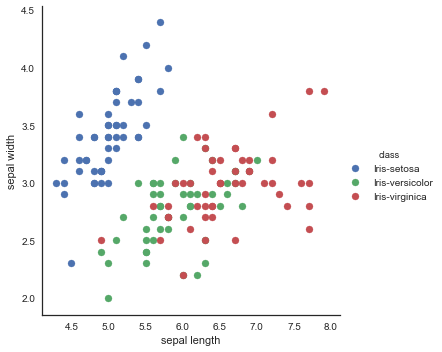

In [18]:
#Scatter the plots with seaborn
sns.FacetGrid(train_data,hue='class',size=5) \
.map(plt.scatter,"sepal length","sepal width") \
.add_legend()

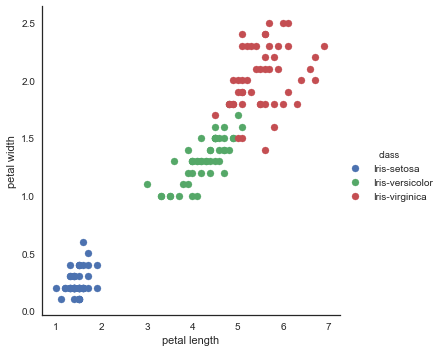

In [20]:
#Scatter plots to observe the various lengths distribution between petal length and petal width
sns.FacetGrid(train_data,hue='class',size=5) \
.map(plt.scatter,"petal length","petal width")\
.add_legend()

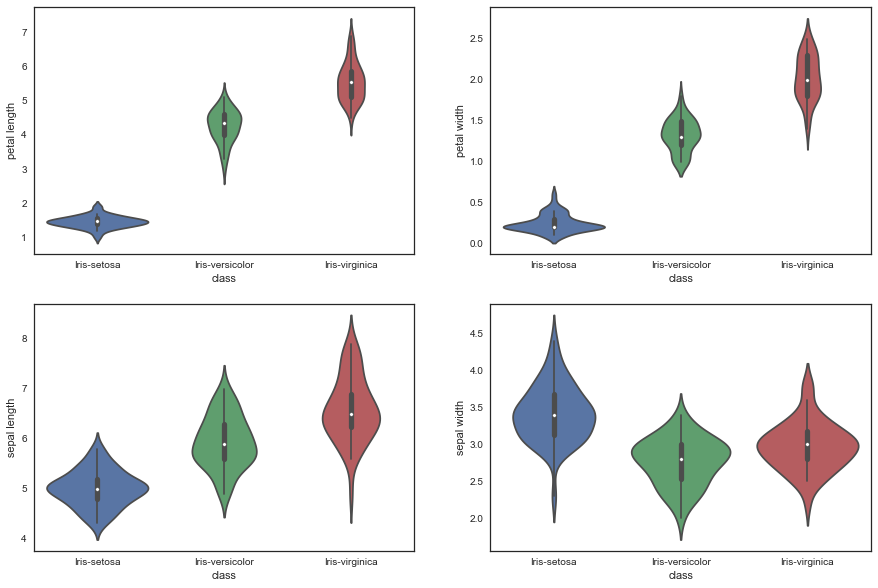

In [36]:
#violin plot describes the data with different class regions
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal length',data=train_data)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal width',data=train_data)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal length',data=train_data)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal width',data=train_data)

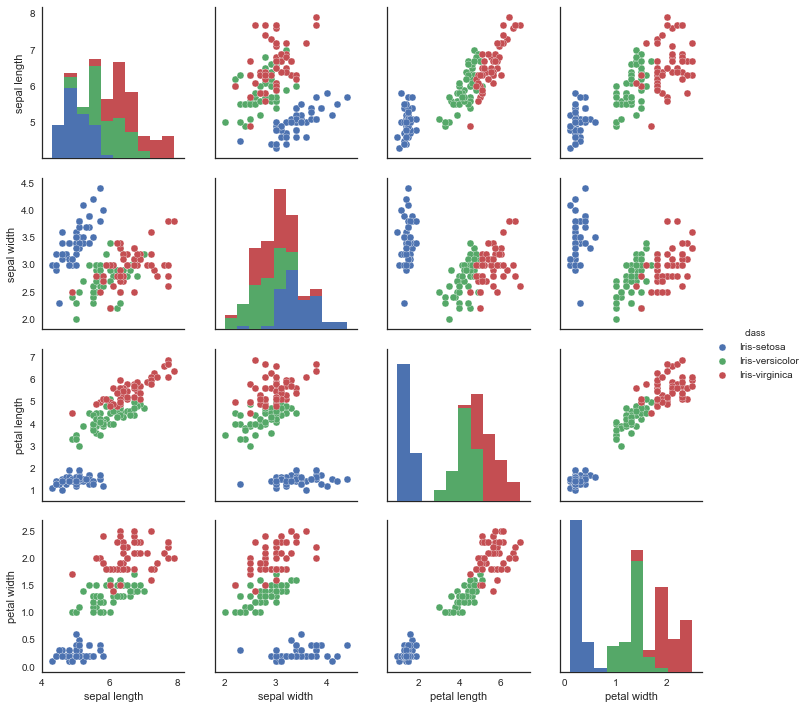

In [37]:
sns.pairplot(train_data,hue='class')

In [66]:
#split the data for training and testing
from sklearn.cross_validation import train_test_split
train,test=train_test_split(train_data,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [67]:
train_X=train[['sepal length','sepal width','petal length','petal width']]
train_Y=train['class']
test_X=test[['sepal length','sepal width','petal length','petal width']]
test_Y=test['class']

In [68]:
train_X.head(2)

,sepal length,sepal width,petal length,petal width
70,5.9,3.2,4.8,1.8
113,5.7,2.5,5.0,2.0


In [69]:
train_Y.head(2)

70     Iris-versicolor
113     Iris-virginica
Name: class, dtype: object

In [70]:
test_X.head(2)

,sepal length,sepal width,petal length,petal width
15,5.7,4.4,1.5,0.4
6,4.6,3.4,1.4,0.3


In [71]:
test_Y.head(2)

15    Iris-setosa
6     Iris-setosa
Name: class, dtype: object

In [86]:
#select the model to get the prediction
from sklearn import metrics
#from sklearn import classification_report
#naive bayes model
gaussian = GaussianNB()
gaussian.fit(train_X, train_Y)
pred_Y = gaussian.predict(test_X)
# Summary of the predictions made by the classifier
print(metrics.classification_report(test_Y, pred_Y))
print(metrics.confusion_matrix(test_Y, pred_Y))
#Accuracy
print("Accuracy is : ",metrics.accuracy_score(test_Y,pred_Y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.95      1.00      0.98        20
 Iris-virginica       1.00      0.90      0.95        10

    avg / total       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 20  0]
 [ 0  1  9]]
Accuracy is :  0.9777777777777777


In [87]:
#Test Predictions for naive bayes model
new_X=np.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
new_pred=gaussian.predict(new_X)
print("Predicted Species is :",new_pred)

Predicted Species is : ['Iris-versicolor' 'Iris-setosa']


In [82]:
#Selecting the LinearSVC model 
model=LinearSVC()
model.fit(train_X,train_Y)
pred_Y=model.predict(test_X)
# Summary of the predictions made by the classifier
print(metrics.classification_report(test_Y, pred_Y))
print(metrics.confusion_matrix(test_Y, pred_Y))
#Accuracy
print("Accuracy is : ",metrics.accuracy_score(test_Y,pred_Y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.91      1.00      0.95        10

    avg / total       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 19  1]
 [ 0  0 10]]
Accuracy is :  0.9777777777777777


In [88]:
#Test Predictions for Linear SVC model
new_X=np.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
new_pred=model.predict(new_X)
print("Predicted Species is :",new_pred)

Predicted Species is : ['Iris-versicolor' 'Iris-setosa']
